<a href="https://colab.research.google.com/github/SeeZwee/Computer-Vision-Project/blob/main/ComputerVisionProject_Jacques_Seth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Object Detection Using YOLO <b> </h1></center>

This tutorial is designed to provide a comprehensive understanding of how to use YOLO, a state-of-the-art method in computer vision, for detecting objects in images.

Object detection and classification is a key technology in many areas, such as automated vehicles, security, and even healthcare.

We will begin with the basics of preparing (pre processing) an image dataset, ensuring it is ready for effective model training.We will then explore how YOLO, a type of convolutional neural network, automatically extracts features from images to recognize different objects. Understanding this process is crucial for grasping how YOLO operates.

The core of this tutorial is focused on transfer learning using YOLO. We will teach you how to take a pre-trained YOLO model and adapt it to a new dataset. This technique is efficient and powerful, allowing us to harness the strengths of YOLO with less computational effort.

By the end of this tutorial, you will have hands-on experience with preparing data, implementing YOLO, and understanding the principles behind it. This tutorial aims to equip students with practical skills and knowledge in one of the most exciting fields in technology.

Since its inception, the YOLO family of object detection models has come a long way. YOLOv8 is the most recent addition to this famous anchor-based single-shot family of object detectors. It comes with a bunch of improvements which include state-of-the-art accuracy and speed.  In this article, we will be fine tuning the YOLOv8 object detection model on a real-world pothole detection dataset.

In the previous lecture, you were asked to make your own custom datasets for a project you want to work on. Today we will explore how to finetune YOLO on a certain dataset.  

Importing required Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Description






Fruit Images for Object Detection

available on kaggle => https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection


- 240 images in train folder. 60 images in test folder.

- 3 different fruits:

    - Apple

    - Banana

    - Orange

The labels are in xml format, which is Extensible markup language.Storing image dataset labels in XML format is quite common. XML provides a clear, hierarchical structure which is ideal for representing the complex data associated with image labels. This includes not just the class of the object, but potentially a wealth of other information like bounding box coordinates, object IDs, and additional metadata.


# Data Preprocessing

For preprocessing:
- We have to convert the dataset into that acceptable by YOLO.
  - Heirarchy of folders should be the one accepted by YOLO
  - Labels format should be darknet YOLO.
  - Labels files should be .txt files
- Check and see if there are any missing labels or images. And remove them from dataset.


## Heirarchy of Folders correction

Defining paths to train and test folders.

In [ ]:
test_dir = "/content/drive/MyDrive/hagrid_2k/test"
train_dir = "/content/drive/MyDrive/hagrid_2k/train"
val_dir = "/content/drive/MyDrive/hagrid_2k/val"



The train and test folders have all the images and labels together.

But for YOLO, the directories should be in:

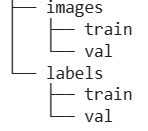


Making directories according to above struture of folders

In [ ]:
#NO NEED TO RUN
'''
#import os
#run it once for making directories
os.makedirs('/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data')
os.makedirs('/content/drive/MyDrive/fruits/Final_data/images')
os.makedirs('/content/drive/MyDrive/fruits/Final_data/labels')
os.makedirs('/content/drive/MyDrive/fruits/images/train')
os.makedirs('/content/drive/MyDrive/fruits/Final_data/images/val')
os.makedirs('/content/drive/MyDrive/fruits/Final_data/images/train')
os.makedirs('/content/drive/MyDrive/fruits/Final_data/labels/train')
os.makedirs('/content/drive/MyDrive/fruits/Final_data/labels/val')
'''

"\n#import os\n#run it once for making directories\nos.makedirs('/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data')\nos.makedirs('/content/drive/MyDrive/fruits/Final_data/images')\nos.makedirs('/content/drive/MyDrive/fruits/Final_data/labels')\nos.makedirs('/content/drive/MyDrive/fruits/images/train')\nos.makedirs('/content/drive/MyDrive/fruits/Final_data/images/val')\nos.makedirs('/content/drive/MyDrive/fruits/Final_data/images/train')\nos.makedirs('/content/drive/MyDrive/fruits/Final_data/labels/train')\nos.makedirs('/content/drive/MyDrive/fruits/Final_data/labels/val')\n"

In [ ]:
#set the paths to labels and images directory
'''
label_dir= "/content/drive/MyDrive/fruits/Final_data/labels"
image_dir="/content/drive/MyDrive/fruits/Final_data/images"
'''

Copy XML files and jpg files from the train folder to the folders created.

In [ ]:
'''
#import shutil
#run it once for copying!
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_dir, file), os.path.join(label_dir, "train"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(train_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"train", new_filename), "JPEG")
        #shutil.copy(os.path.join(train_dir, file), os.path.join(image_dir, "train"))


#Copy XML files and jpg files from the test folder to the folders created.
for file in os.listdir(test_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(test_dir, file), os.path.join(label_dir, "val"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(test_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"val", new_filename), "JPEG")
        #shutil.copy(os.path.join(test_dir, file), os.path.join(image_dir, "val"))
'''

Visualizing somme pictures from the dataset

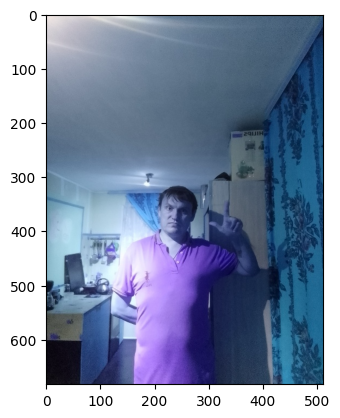

1 0.64602066 0.554829715 0.12678816 0.10303869



' for idx, image in enumerate(os.listdir(os.path.join(image_dir, folder))):\n      img = cv2.imread(os.path.join(image_dir,folder), 1)\n      plt.imshow(img)\n      plt.show()\n\n      if idx == 3:\n          break'

In [ ]:
#visualize first four sample images from train data
#https://www.tutorialspoint.com/python/os_walk.htm
image_dir="/content/drive/MyDrive/hagrid_2k/train/images"
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith('.jpg'):
            img = cv2.imread(os.path.join(root, file),1)
            plt.imshow(img)
            plt.show()
            with open(os.path.join("/content/drive/MyDrive/hagrid_2k/train/labels", file.replace(".jpg",".txt")), 'r') as file:
              content = file.read()
              print(content)  # This will print the entire content of the file
            # Exit after displaying the first image
            break
''' for idx, image in enumerate(os.listdir(os.path.join(image_dir, folder))):
      img = cv2.imread(os.path.join(image_dir,folder), 1)
      plt.imshow(img)
      plt.show()

      if idx == 3:
          break'''


## Creating Text files for labels
Creating Dataframes from .xml files, from which we will eventually create .txt file for each image


In [ ]:
#Also unused
'''#import glob
#import xml.etree.ElementTree as ET

df = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (trees).

for idx, anno in enumerate(glob.glob(label_dir+"/train" + '/*.xml')):

    trees = ET.parse(anno)

    print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    df['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]
'''

'#import glob\n#import xml.etree.ElementTree as ET\n\ndf = {\'name\': [],\n      \'label\': [],\n      \'width\': [],\n      \'height\': [],\n     \'xmin\': [],\n     \'ymin\': [],\n     \'xmax\': [],\n     \'ymax\': []}\n\n\n#This is the way to handle xml format files which are in heirarchial form (trees).\n\nfor idx, anno in enumerate(glob.glob(label_dir+"/train" + \'/*.xml\')):\n\n    trees = ET.parse(anno)\n\n    print(anno)\n    root = trees.getroot()\n    width, height = [], []\n    for item in root.iter():\n        print(item)\n\n        if item.tag == \'size\':\n            for attr in list(item):\n                if attr.tag == \'width\':\n                    width =int(round(float(attr.text)))\n                if attr.tag == \'height\':\n                    height = int(round(float(attr.text)))\n\n        if item.tag == \'object\':\n            for attr in list(item):\n                if \'name\' in attr.tag:\n                    label = attr.text\n                    df[\'la

Doing the same for validation data labels.


In [ ]:
'''#import glob
#import xml.etree.ElementTree as ET

df2 = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (tees).

for idx, anno in enumerate(glob.glob(label_dir+"/val" + '/*.xml')):

    trees = ET.parse(anno)

    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df2['label'] += [label]
                    df2['width'] += [width]
                    df2['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]]
                    df2['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df2['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df2['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df2['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df2['ymax'] += [ymax]'''

'#import glob\n#import xml.etree.ElementTree as ET\n\ndf2 = {\'name\': [],\n      \'label\': [],\n      \'width\': [],\n      \'height\': [],\n     \'xmin\': [],\n     \'ymin\': [],\n     \'xmax\': [],\n     \'ymax\': []}\n\n\n#This is the way to handle xml format files which are in heirarchial form (tees).\n\nfor idx, anno in enumerate(glob.glob(label_dir+"/val" + \'/*.xml\')):\n\n    trees = ET.parse(anno)\n\n    #print(anno)\n    root = trees.getroot()\n    width, height = [], []\n    for item in root.iter():\n        #print(item)\n\n        if item.tag == \'size\':\n            for attr in list(item):\n                if attr.tag == \'width\':\n                    width =int(round(float(attr.text)))\n                if attr.tag == \'height\':\n                    height = int(round(float(attr.text)))\n\n        if item.tag == \'object\':\n            for attr in list(item):\n                if \'name\' in attr.tag:\n                    label = attr.text\n                    df2[\'l

In [ ]:
'''import pandas as pd
train_df = pd.DataFrame(df)
val_df=pd.DataFrame(df2)
#df1.head()
val_df.head()'''

,name,label,width,height,xmin,ymin,xmax,ymax
0,apple_91,apple,960,573,227,62,723,500
1,apple_90,apple,1814,2000,58,124,1776,1910
2,apple_89,apple,319,364,19,68,278,343
3,apple_87,apple,480,480,43,134,358,455
4,apple_88,apple,1300,1300,242,460,963,1229


Visualizing one of the image in train set with the bounding box

In [ ]:
'''index= 10 #picture to visualize

#import cv2
image = cv2.imread(os.path.join(image_dir,"train", train_df["name"][index]+".jpg"), 1)
# Draw rectangle
cv2.rectangle(image, (train_df['xmin'][index], train_df['ymin'][index]), (train_df['xmax'][index], train_df['ymax'][index]), (255, 0, 0), 2)
# Put label (class_id) near the bbox
label = train_df["label"][index]
cv2.putText(image, str(label), (train_df['xmin'][index], train_df['ymin'][index]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
# Display image
plt.imshow(image)
plt.axis('off')
plt.show()'''

NameError: name 'train_df' is not defined

Checking to see if the above image has bounding boxes around other apples or not.

In [ ]:
'''train_df["name"][index]
filtered_df = train_df[train_df['name'] == train_df["name"][index]]
print(filtered_df)'''

NameError: name 'train_df' is not defined

Checking to see the datatypes of all the columns and if there is any null value that needs to be eliminated from the data.

In [ ]:
#val_df.info()

NameError: name 'val_df' is not defined

What different types of labels are assigned to each sample and checking if they match the provided label/class information, i.e. there are no extra labels due to mistakes in spellings etc.

In [ ]:
'''print(train_df['label'].unique())
print(val_df['label'].unique())'''

['apple' 'banana' 'orange']
['apple' 'banana' 'orange']


We need to map labels to class_ids required for YOLO

In [ ]:
'''label_map = { 'orange': 0,
            'apple': 1,
            'banana': 2}

train_df['class'] = train_df['label'].map(label_map)
val_df['class'] = val_df['label'].map(label_map)'''

In [ ]:
'''train_df.head()'''

,name,label,width,height,xmin,ymin,xmax,ymax,class
0,apple_20,apple,0,0,23,55,458,497,1
1,apple_2,apple,250,250,37,52,205,222,1
2,apple_19,apple,1600,1200,158,116,1264,1143,1
3,apple_18,apple,610,458,144,136,470,411,1
4,apple_14,apple,960,640,318,146,680,511,1


convertig the bounding box format to the one required by YOLO:




In [ ]:
'''# Training data
train_df['x_center'] = (train_df['xmin']+train_df['xmax'])/(2*train_df["width"])
train_df['y_center'] = (train_df['ymin']+train_df['ymax'])/(2*train_df["height"])
train_df['box_width'] = (train_df['xmax']-train_df['xmin'])/ train_df["width"]
train_df['box_height'] = (train_df['ymax']-train_df['ymin'])/train_df["height"]

#Validation data
val_df['x_center'] = (val_df['xmin']+val_df['xmax'])/(2*val_df["width"])
val_df['y_center'] = (val_df['ymin']+val_df['ymax'])/(2*val_df["height"])
val_df['box_width'] = (val_df['xmax']-val_df['xmin'])/ val_df["width"]
val_df['box_height'] = (val_df['ymax']-val_df['ymin'])/val_df["height"]'''

NameError: name 'train_df' is not defined

In [ ]:
'''train_df.head()'''

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,apple_20,apple,0,0,23,55,458,497,1,inf,inf,inf,inf
1,apple_2,apple,250,250,37,52,205,222,1,0.484000,0.548000,0.672000,0.680000
2,apple_19,apple,1600,1200,158,116,1264,1143,1,0.444375,0.524583,0.691250,0.855833
3,apple_18,apple,610,458,144,136,470,411,1,0.503279,0.597162,0.534426,0.600437
4,apple_14,apple,960,640,318,146,680,511,1,0.519792,0.513281,0.377083,0.570312


Deleting all the sample with Nan values in training and validation data

In [ ]:
'''#training
print("before deleting (train data): " , train_df.shape)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
print("after deleting(train_data): " ,train_df.shape)

#validation
print("before deleting (val data): " , val_df.shape)
val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
val_df.dropna(inplace=True)
print("after deleting(val data): " , val_df.shape)'''

before deleting (train data):  (465, 13)
after deleting(train_data):  (420, 13)
before deleting (val data):  (117, 13)
after deleting(val data):  (110, 13)


converting the dataframe to type *str* (string) to be stored in text files.

In [ ]:
'''train_df = train_df.astype(str)
val_df = val_df.astype(str)'''

If there are more than one bounding boxes in single image, they should be written in one text file. As, you can see in the below example that one image has so many bounding boxes.

In [ ]:
'''filtered_df = train_df[train_df['name'] == train_df["name"][100]]
(filtered_df.head(15))'''

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
100,apple_49,apple,271,300,15,87,255,291,1,0.4981549815498155,0.63,0.8856088560885609,0.68


In [ ]:
'''#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{name}.txt', 'w') as file:
            file.write(text)'''

SyntaxError: incomplete input (<ipython-input-3-28c6ed302be8>, line 1)

## Checking Missing Files

Checking the folders if every image file has a corresponding label file


(We will copy the code, we already used in previous turorial after updating)

In [ ]:
#The lists of all the images and labels for train and validation set:
hagrid_dir="/content/drive/MyDrive/hagrid_2k/"
train_images=glob.glob(os.path.join(hagrid_dir, "train","images",'*.jpg'))
train_labels=glob.glob(os.path.join(hagrid_dir, "train","labels",'*.txt'))
val_images=glob.glob(os.path.join(hagrid_dir, "val","images",'*.jpg'))
val_labels=glob.glob(os.path.join(hagrid_dir, "val","labels",'*.txt'))
test_images=glob.glob(os.path.join(hagrid_dir, "test","images",'*.jpg'))
test_labels=glob.glob(os.path.join(hagrid_dir, "test","labels",'*.txt'))
print(val_labels)

# Get the list of filenames without extensions
image_files_train = {file.split("/")[-1].split(".")[0] for file in train_images}
label_files_train = {file.split("/")[-1].split(".")[0] for file in train_labels}

image_files_val = {file.split("/")[-1].split(".")[0] for file in val_images}
label_files_val = {file.split("/")[-1].split(".")[0] for file in val_labels}

image_files_test = {file.split("/")[-1].split(".")[0] for file in test_images}
label_files_test = {file.split("/")[-1].split(".")[0] for file in test_labels}
#print(image_files_val)



['/content/drive/MyDrive/hagrid_2k/val/labels/0b3ab004-599a-41cf-b321-75e0d38f372b.txt', '/content/drive/MyDrive/hagrid_2k/val/labels/0d5b5f2e-f67b-40de-9de8-bd7b81c30a0c.txt', '/content/drive/MyDrive/hagrid_2k/val/labels/0b345732-5e67-45e6-8e18-719b8ccc75ee.txt', '/content/drive/MyDrive/hagrid_2k/val/labels/00c9fd49-2fab-4117-9af1-79c35668a739.txt', '/content/drive/MyDrive/hagrid_2k/val/labels/0a97608d-0c1e-4b7f-bab3-31ce4fcbc080.txt', '/content/drive/MyDrive/hagrid_2k/val/labels/0bb4d83f-fb5a-4977-8102-01ff6c2ce32b.txt', '/content/drive/MyDrive/hagrid_2k/val/labels/00a303f3-6d9c-4a6f-a858-8fcf415f4fc8.txt', '/content/drive/MyDrive/hagrid_2k/val/labels/0b81c8fd-0e20-480d-bf59-d7d16634a4ee.txt', '/content/drive/MyDrive/hagrid_2k/val/labels/0c5d7b1c-198f-4367-90f8-13ec9eabf8f9.txt', '/content/drive/MyDrive/hagrid_2k/val/labels/0b4914ac-d914-469e-867d-26a5bcceea1c.txt', '/content/drive/MyDrive/hagrid_2k/val/labels/0a0f4035-c217-4f30-806e-158c11386005.txt', '/content/drive/MyDrive/hagrid_

In [ ]:
print(len(image_files_val), "  =  ", len(label_files_val))
print(len(image_files_train), "  =  ", len(label_files_train))
print(len(image_files_test), "  =  ", len(label_files_test))

400   =   400
1200   =   1200
464   =   464


In [ ]:
# Find extra files in each folder

#TRAINING DATA
extra_images_train = image_files_train - label_files_train
extra_labels_train = label_files_train - image_files_train
# Output the results
print(f"Training Extra images (without corresponding labels): {extra_images_train}")
print(f"Training Extra labels (without corresponding images): {extra_labels_train}")


#VALIDATION DATA
extra_images_val = image_files_val - label_files_val
extra_labels_val = label_files_val - image_files_val
# Output the results
print(f"Validation Extra images (without corresponding labels): {extra_images_val}")
print(f"Validation Extra labels (without corresponding images): {extra_labels_val}")

#Testing DATA
extra_images_test = image_files_test - label_files_test
extra_labels_test = label_files_test - image_files_test
# Output the results
print(f"Testing Extra images (without corresponding labels): {extra_images_test}")
print(f"Testing Extra labels (without corresponding images): {extra_labels_test}")

Training Extra images (without corresponding labels): set()
Training Extra labels (without corresponding images): set()
Validation Extra images (without corresponding labels): set()
Validation Extra labels (without corresponding images): set()
Testing Extra images (without corresponding labels): set()
Testing Extra labels (without corresponding images): set()


Make sure that the above info is correct by chceking the data manually.

Now removing from the dataset:

In [ ]:
#Unnecessary but needs fix if this wants to work
'''for file in extra_images_train:
     os.remove(os.path.join(image_dir, "train", file + '.jpg')) # or '.png' depending on your image format

for file in extra_images_val:
     os.remove(os.path.join(image_dir, "val", file + '.jpg'))

for file in extra_images_test:
     os.remove(os.path.join(image_dir, "test", file + '.jpg'))
     '''

'for file in extra_images_train:\n     os.remove(os.path.join(image_dir, "train", file + \'.jpg\')) # or \'.png\' depending on your image format\n\nfor file in extra_images_val:\n     os.remove(os.path.join(image_dir, "val", file + \'.jpg\'))\n\nfor file in extra_images_test:\n     os.remove(os.path.join(image_dir, "test", file + \'.jpg\'))\n     '

Now run the above cells again to find if all the missing data is deleted.

# Custom object detection using YOLO

First install and import

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

## Training YOLO

We are going to select small pretrained (on COCO dataset) model of YOLOv8

In [ ]:
model = YOLO('yolov8s.pt') # pretrained model

100%|██████████| 21.5M/21.5M [00:00<00:00, 85.2MB/s]


The detailed architecture of the model can be seen from:


In [ ]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
'''import os
import shutil

# Original label directory and temporary directory for remapped labels
original_label_dir = '/content/drive/MyDrive/hagrid_2k/newlabels'
temp_label_dir = '/content/drive/MyDrive/hagrid_2k/tempnewlabels'

# Define the mapping from original class IDs to YOLO class IDs
class_mapping = {
    0: 4,  # 'dislike' to 4
    1: 6,  # 'four' to 6
    2: 3,  # 'like' to 3
    3: 7,  # 'ok' to 7
    4: 5,  # 'one' to 5
    5: 2,  # 'peace' to 2
    6: 0,  # 'three' to 0
    7: 1   # 'thumb_index' to 1
}

# Create temporary label directory
if os.path.exists(temp_label_dir):
    shutil.rmtree(temp_label_dir)  # Remove old temp directory if exists
os.makedirs(temp_label_dir)

# Process each label file
for label_file in os.listdir(original_label_dir):
    file_path = os.path.join(original_label_dir, label_file)
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Remap labels according to the class_mapping
    new_lines = []
    for line in lines:
        parts = line.strip().split()
        original_class_id = int(parts[0])

        # Check if the original class ID is in the mapping
        if original_class_id in class_mapping:
            parts[0] = str(class_mapping[original_class_id])
            new_lines.append(" ".join(parts))

    # Write the remapped labels to the temporary directory
    new_file_path = os.path.join(temp_label_dir, label_file)
    with open(new_file_path, 'w') as f:
        f.write("\n".join(new_lines) + "\n")

print("Labels have been remapped and saved to the temporary folder.")
===========================================================================
'''
import os

# Define your paths
val_images_path = '/content/drive/MyDrive/hagrid_2k/test/images'
val_labels_path = '/content/drive/MyDrive/hagrid_2k/test/labels'

# List all image files in the validation set
val_images = [f for f in os.listdir(val_images_path) if f.endswith('.jpg')]  # Adjust the extension if needed

# Check for corresponding label files
for img in val_images:
    label_file = img.replace('.jpg', '.txt')  # Adjust the extension if needed
    if not os.path.isfile(os.path.join(val_labels_path, label_file)):
        print(f'Label file missing for: {img}')

'''
===========================================================================
import os

# Path to the directory containing the files
directory = '/content/drive/MyDrive/hagrid_2k/test/images'

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the file ends with ".JPG"
    if filename.endswith(".JPG"):
        # Create the new filename with ".jpg"
        new_filename = filename.replace(".JPG", ".jpg")
        # Get the full path for both the original and new file names
        old_file = os.path.join(directory, filename)
        new_file = os.path.join(directory, new_filename)
        # Rename the file
        os.rename(old_file, new_file)
        print(f'Renamed: {filename} to {new_filename}')

print("Renaming completed.")'''

'\n===========================================================================\nimport os\n\n# Path to the directory containing the files\ndirectory = \'/content/drive/MyDrive/hagrid_2k/test/images\'\n\n# Loop through each file in the directory\nfor filename in os.listdir(directory):\n    # Check if the file ends with ".JPG"\n    if filename.endswith(".JPG"):\n        # Create the new filename with ".jpg"\n        new_filename = filename.replace(".JPG", ".jpg")\n        # Get the full path for both the original and new file names\n        old_file = os.path.join(directory, filename)\n        new_file = os.path.join(directory, new_filename)\n        # Rename the file\n        os.rename(old_file, new_file)\n        print(f\'Renamed: {filename} to {new_filename}\')\n\nprint("Renaming completed.")'

In [ ]:
'''%%writefile config.yaml
path: /content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data
train: /content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data/images/val

# Classes
nc: 3 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: orange
  1: apple
  2: banana'''

Writing config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [ ]:
#Generally if the model isn't too far then 5 epochs is fine, maybe 10 if it's further away
#Set batch size as high as possible, Colab could use 16. Multiples of 8.
model.train(data="/content/drive/MyDrive/hagrid_2k/config.yaml",epochs=5,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/hagrid_2k/config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 28.9MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/hagrid_2k/train/labels.cache... 1200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/hagrid_2k/val/labels.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.16G      1.049      4.322      1.142         16        640: 100%|██████████| 150/150 [04:17<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.83it/s]

                   all        400        400      0.676       0.76      0.752      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.18G     0.8521      1.386      1.028         14        640: 100%|██████████| 150/150 [00:41<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]

                   all        400        400      0.862      0.841      0.908      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.15G     0.8047      1.063     0.9885         14        640: 100%|██████████| 150/150 [00:37<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.19it/s]

                   all        400        400       0.92      0.883      0.953      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.18G      0.782      0.882     0.9857         15        640: 100%|██████████| 150/150 [00:37<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.25it/s]

                   all        400        400      0.924      0.902      0.956      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.18G     0.6955     0.7064     0.9447         18        640: 100%|██████████| 150/150 [00:37<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.92it/s]

                   all        400        400      0.948      0.962      0.981       0.83



5 epochs completed in 0.126 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.35it/s]


                   all        400        400      0.948      0.962      0.981       0.83
                 three         50         50      0.852       0.92      0.948      0.806
           thumb_index         50         50      0.986          1      0.995      0.892
                 peace         50         50       0.92       0.94      0.967      0.813
                  like         50         50       0.96      0.962      0.975      0.804
               dislike         50         50      0.995          1      0.995      0.826
                   one         50         50      0.983          1      0.995      0.817
                  four         50         50      0.909       0.96      0.983      0.842
                    ok         50         50      0.979      0.916      0.988       0.84
Speed: 0.3ms preprocess, 4.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e93586f1030>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [ ]:

model = YOLO("/content/drive/MyDrive/hagrid_2k/best.pt")
metrics = model.val(split="test")  # Used to test the model using the testing dataset
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/12UVcFmmalwYw8VukDaYNA6i6htZkysY0/hagrid_2k/test/labels.cache... 464 images, 0 backgrounds, 1 corrupt: 100%|██████████| 464/464 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/12UVcFmmalwYw8VukDaYNA6i6htZkysY0/hagrid_2k/test/images/025b8e14-IMG_0500.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.5552]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:14<00:00,  1.94it/s]


                   all        463        463      0.964      0.956      0.988      0.821
                 three         58         58      0.915      0.926      0.974      0.813
           thumb_index         59         59          1      0.952      0.989      0.831
                 peace         58         58      0.954      0.948      0.988      0.819
                  like         58         58      0.947      0.933      0.974      0.764
               dislike         57         57          1      0.943      0.994      0.814
                   one         57         57      0.933      0.982      0.993      0.795
                  four         58         58       0.96          1      0.994      0.868
                    ok         58         58          1      0.964      0.994      0.863
Speed: 1.2ms preprocess, 6.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val4


0.9560702244469863

Showing confusion matrix, that is already stored in detect/train folder

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train/confusion_matrix_normalized.png')

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/confusion_matrix_normalized.png'

##Prediction

In [ ]:

model = YOLO("/content/drive/MyDrive/hagrid_2k/best.pt")
model.val(data="/content/drive/MyDrive/hagrid_2k/config.yaml", imgsz=640, split='test')
# Predict with the model with any image from internet?
#results = model('https://canada-info.ca/wp-content/uploads/elementor/thumbs/close-up-version-1-qb0g0fi6m737kdhsqwyd9sa6w5oc6iw75suqyyf6vi.jpg', save=True)

SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-10-36b2a6f1fb5a>, line 3)

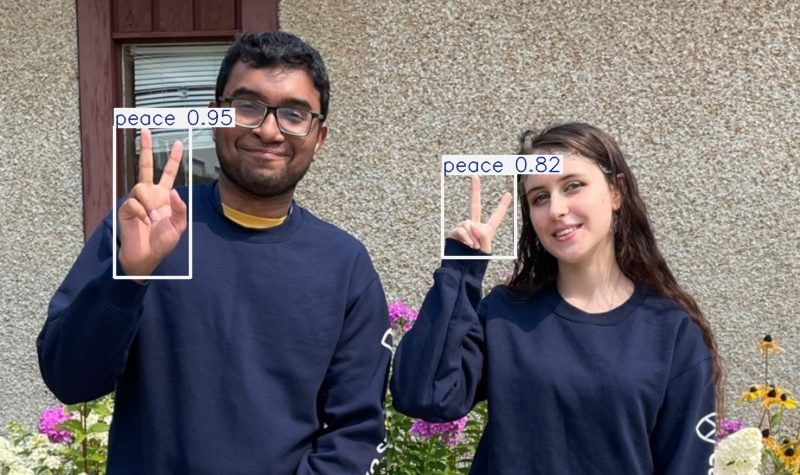

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict/close-up-version-1-qb0g0fi6m737kdhsqwyd9sa6w5oc6iw75suqyyf6vi.jpg')

In [ ]:
model = YOLO('/content/drive/MyDrive/hagrid_2k/best.pt')  # Update with your saved weights path
results = model.val(data="/content/drive/MyDrive/hagrid_2k/config.yaml", imgsz=640, split='test')

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/12UVcFmmalwYw8VukDaYNA6i6htZkysY0/hagrid_2k/test/labels.cache... 464 images, 0 backgrounds, 1 corrupt: 100%|██████████| 464/464 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/12UVcFmmalwYw8VukDaYNA6i6htZkysY0/hagrid_2k/test/images/025b8e14-IMG_0500.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.5552]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:17<00:00,  1.67it/s]


                   all        463        463      0.964      0.956      0.988      0.821
                 three         58         58      0.915      0.926      0.974      0.813
           thumb_index         59         59          1      0.952      0.989      0.831
                 peace         58         58      0.954      0.948      0.988      0.819
                  like         58         58      0.947      0.933      0.974      0.764
               dislike         57         57          1      0.943      0.994      0.814
                   one         57         57      0.933      0.982      0.993      0.795
                  four         58         58       0.96          1      0.994      0.868
                    ok         58         58          1      0.964      0.994      0.863
Speed: 1.2ms preprocess, 6.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val5
